In [20]:
import pandas as pd
import numpy as np

In [23]:
#Представлен датасет некой интернет-компании. 
#Вопрос: a.Какой рекламный канал принёс больше всего дохода за всё время?
#Вопрос b.Как изменился средний чек транзакции после введения коронавирусных ограничений? Как он изменился для пользователей,
# покупающих с промокодом и без? (параметр «promo_activated»)
# Вопрос c. Можно ли с уверенностью в 95% сказать, что CR (коэффициент конверсии в транзакцию) в выходные дни отличается 
#от CR в будние дни?

In [21]:
df = pd.read_csv(r"C:\\Users\\Администратор\\Desktop\\python\\adv_data.csv", encoding='windows-1251', sep=',', parse_dates=[0])
df

,date,source,medium,delivery_available,device_type,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue
0,2020-05-11,google,organic,Не определено,Десктоп,no,no,3120,1233,5240,1048,525,90,86649.0
1,2020-05-11,yandex,cpc,Не определено,Мобайл,yes,no,3302,544,9930,1984,1416,217,244478.0
2,2020-05-11,google,cpc,Не определено,Мобайл,no,no,2970,1450,5460,1090,599,100,105150.0
3,2020-05-11,google,cpc,Не определено,Десктоп,no,no,1875,854,4250,848,407,71,79003.0
4,2020-05-11,yandex,organic,Не определено,Десктоп,no,no,2159,1000,4110,824,351,62,61861.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52719,2020-06-21,(direct),(none),Доставка есть,Мобайл,yes,yes,65,4,250,50,58,4,4821.0
52720,2020-08-09,co-promo,email,Доставка есть,Мобайл,no,no,43,2,250,50,23,1,7348.0
52721,2020-09-22,google,cpc,Доставка есть,Мобайл,yes,yes,153,3,250,50,58,1,958.0
52722,2020-08-25,(direct),(none),Не определено,Мобайл,yes,yes,219,8,250,50,45,1,828.0


In [24]:
#Вопрос: a.Какой рекламный канал принёс больше всего дохода за всё время?

In [29]:
df.groupby('source')['revenue'].sum().sort_values(ascending=False)
#Решение: группируем по полю "source", находим сумму 'revenue' по каждой группе; сортируем по убыванию
#Ответ: yandex 

source
yandex           4.674748e+08
google           4.565170e+08
(direct)         2.384474e+08
admitad          6.573886e+07
eLama            1.643239e+07
cityads          1.429077e+07
promo            5.363685e+06
co-promo         3.347826e+06
newsletter       2.225289e+06
other            1.839654e+06
DuckDuckGo       9.214030e+05
vk               6.176850e+05
actionpay        5.557170e+05
bing             4.727260e+05
advertise        4.404360e+05
mytarget         4.136530e+05
opmcpa           3.938250e+05
facebook         2.940910e+05
instagram        1.527800e+04
yandex_direct    1.296000e+04
sailplay         1.294100e+04
exponea          8.804000e+03
baidu            0.000000e+00
youtube          0.000000e+00
Name: revenue, dtype: float64

In [ ]:
#Вопрос b.Как изменился средний чек транзакции после введения коронавирусных ограничений? Как он изменился для пользователей,
# покупающих с промокодом и без? (параметр «promo_activated»)

In [35]:
#добавляем столбец period  - в формате ГГГГ-ММ, чтобы группировать данные по месяцам
df['period']=df.date.dt.to_period('M')
df.head(3)

,date,source,medium,delivery_available,device_type,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue,period
0,2020-05-11,google,organic,Не определено,Десктоп,no,no,3120,1233,5240,1048,525,90,86649.0,2020-05
1,2020-05-11,yandex,cpc,Не определено,Мобайл,yes,no,3302,544,9930,1984,1416,217,244478.0,2020-05
2,2020-05-11,google,cpc,Не определено,Мобайл,no,no,2970,1450,5460,1090,599,100,105150.0,2020-05


<AxesSubplot:xlabel='period'>

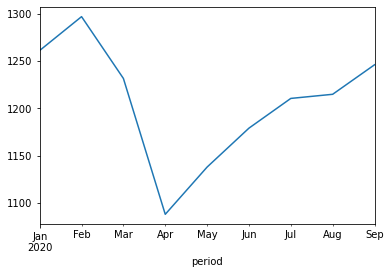

In [39]:
 # находим средний чек в помесячной разбивке  - сумму выручки делим на сумму транзакций за период
av_check = pd.Series(df.groupby('period')['revenue'].sum()/df.groupby('period')['transactions'].sum())
av_check.plot()

In [40]:
av_check

period
2020-01    1261.019182
2020-02    1296.709472
2020-03    1231.478035
2020-04    1088.105668
2020-05    1137.963165
2020-06    1179.040242
2020-07    1210.413338
2020-08    1214.766272
2020-09    1245.895276
Freq: M, dtype: float64

In [ ]:
#Ответ: после введения коронавирусных ограничений - средний чек упал (минимальное значение в апреле - 1088,1)

In [59]:
av_check_promo = pd.DataFrame(df.groupby(['period', 'promo_activated'])['revenue'].sum()/\
                              df.groupby(['period', 'promo_activated'])['transactions'].sum()).reset_index()
av_check_promo.columns = ['period', 'promo_activated', 'av_check']
av_check_promo.head(3)

,period,promo_activated,av_check
0,2020-01,no,1244.530687
1,2020-01,yes,1280.648422
2,2020-02,no,1304.337855


In [57]:
av_check_promo = av_check_promo.pivot_table(index='period',  columns='promo_activated',  values='av_check').reset_index()
av_check_promo.columns = ['period', 'promo_no', 'promo_yes']
av_check_promo

,period,promo_no,promo_yes
0,2020-01,1244.530687,1280.648422
1,2020-02,1304.337855,1288.875879
2,2020-03,1270.425002,1200.820550
3,2020-04,1123.573126,1067.184177
4,2020-05,1111.867914,1158.713236
5,2020-06,1122.527078,1228.282591
6,2020-07,1151.087924,1273.968520
7,2020-08,1182.864093,1258.462771
8,2020-09,1219.845781,1276.098510


<AxesSubplot:>

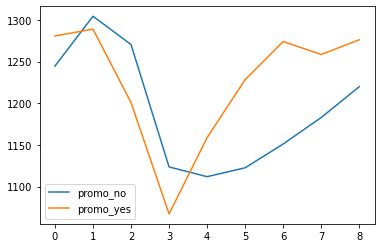

In [58]:
av_check_promo.plot()

In [ ]:
# Для покупающих с промокодом средний чек упал сильнее, но и восстановился быстрее - по сравнению с группой без промокода

In [ ]:
# Вопрос c. Можно ли с уверенностью в 95% сказать, что CR (коэффициент конверсии в транзакцию) в выходные дни отличается 
#от CR в будние дни?

In [74]:
#добавим поле 'weekday', где 5 и 6 - это суббота и воскресенье, а 0-4 - будние дни
df['weekday']=df.date.dt.weekday

In [92]:
#добавим поле 'CR_visits_tr' - коэффициент конверсии
df['CR_visits_tr']=df['transactions']/df['visits']

In [193]:
df.head()

,date,source,medium,delivery_available,device_type,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue,period,weekday,CR_visits_tr
0,2020-05-11,google,organic,Не определено,Десктоп,no,no,3120,1233,5240,1048,525,90,86649.0,2020-05,0,0.072993
1,2020-05-11,yandex,cpc,Не определено,Мобайл,yes,no,3302,544,9930,1984,1416,217,244478.0,2020-05,0,0.398897
2,2020-05-11,google,cpc,Не определено,Мобайл,no,no,2970,1450,5460,1090,599,100,105150.0,2020-05,0,0.068966
3,2020-05-11,google,cpc,Не определено,Десктоп,no,no,1875,854,4250,848,407,71,79003.0,2020-05,0,0.083138
4,2020-05-11,yandex,organic,Не определено,Десктоп,no,no,2159,1000,4110,824,351,62,61861.0,2020-05,0,0.062000


In [179]:
df[df.transactions==0]

,date,source,medium,delivery_available,device_type,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue,period,weekday,CR_visits_tr,CR_checkout_tr
208,2020-05-22,facebook,social,Не определено,Мобайл,yes,no,174,62,760,152,75,0,0.0,2020-05,4,0.0,0.0
305,2020-02-22,facebook,social,Не определено,Мобайл,no,no,288,214,370,74,22,0,0.0,2020-02,5,0.0,0.0
2244,2020-05-19,facebook,social,Не определено,Мобайл,yes,no,112,46,430,86,41,0,0.0,2020-05,1,0.0,0.0
2271,2020-02-09,facebook,social,Не определено,Мобайл,no,no,494,414,300,60,22,0,0.0,2020-02,6,0.0,0.0
5063,2020-09-16,yandex,organic,Не определено,Мобайл,yes,yes,215,12,300,60,46,0,0.0,2020-09,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52432,2020-06-02,(direct),(none),Доставка есть,Мобайл,yes,yes,104,1,240,48,103,0,0.0,2020-06,1,0.0,0.0
52437,2020-06-17,facebook,social,Не определено,Мобайл,yes,no,74,26,250,50,16,0,0.0,2020-06,2,0.0,0.0
52470,2020-02-02,facebook,social,Не определено,Мобайл,no,no,199,160,250,50,6,0,0.0,2020-02,6,0.0,0.0
52517,2020-09-01,(direct),(none),Доставки нет,Десктоп,yes,no,94,6,250,50,32,0,0.0,2020-09,1,0.0,0.0


<AxesSubplot:>

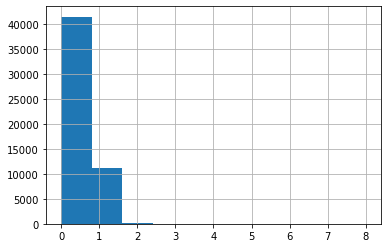

In [99]:
#распределение коэффициента конверсии - не нормальное, поэтому применим метод Bootstrap для анализа двух групп - покупателей
#в будни (test) и выходные (ctrl)
df['CR_visits_tr'].hist()

In [129]:
ctrl = df[(df['weekday']==5) | (df['weekday']==6)]['CR_visits_tr'].values

In [130]:
test = df[(df['weekday']!=5) & (df['weekday']!=6)]['CR_visits_tr'].values

In [126]:
len(ctrl)

15482

In [127]:
len(test)

37242

In [139]:
ctrl.mean()

0.40007239268076883

In [135]:
test.mean()

0.3762875491723773

In [120]:
!pip install bootstrapped

  Created wheel for bootstrapped: filename=bootstrapped-0.0.2-py2.py3-none-any.whl size=13954 sha256=0186a7a8b1b59d2efa87dce5fbcaa7d32464c3cbf76ef8f23c9d5a78b7960775


  Stored in directory: c:\users\администратор\appdata\local\pip\cache\wheels\a9\7b\e9\000ad8cb18a35a7d68051b362c96a867cd24b7b0c7b478329d
Successfully built bootstrapped


In [122]:
#загрузим библиотеки, применим функцию bootstrap_ab
import bootstrapped.bootstrap as bs
import  bootstrapped.stats_functions as bs_stats
import  bootstrapped.compare_functions as bs_compare

In [174]:
boot_results = bs.bootstrap_ab(test=test, ctrl=ctrl, stat_func = bs_stats.mean, compare_func = bs_compare.difference, 
                              return_distribution=True)

<AxesSubplot:>

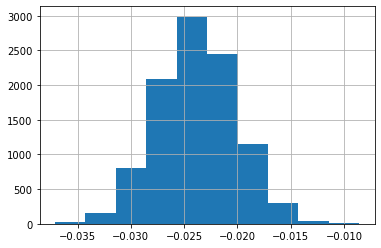

In [175]:
pd.Series(boot_results).hist()

In [176]:
borders = np.percentile(boot_results, [2.5, 97.5])

In [177]:
borders

array([-0.03084145, -0.0167014 ])

In [ ]:
#95%-ный доверительный интервал не включает 0, значит разница между группами статистически значима 
#(конверсия в выходные лучше конверсии в будние дни)

In [144]:
from tqdm.notebook import tqdm

In [166]:
#проведем Бутстрап в ручном режиме
n=1000
result=[]
for _ in tqdm(range(n)):
    a=pd.Series(test).sample(len(test),replace=True).mean()
    b=pd.Series(ctrl).sample(len(ctrl),replace=True).mean()
    result.append(a-b)

  0%|          | 0/1000 [00:00<?, ?it/s]

<AxesSubplot:>

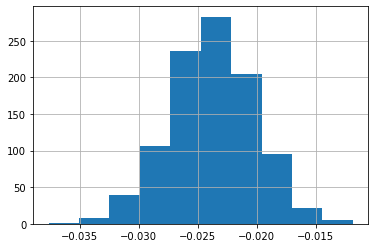

In [167]:
pd.Series(result).hist()

In [170]:
borders1 = np.percentile(result, [2.5, 97.5])
borders1

array([-0.03091645, -0.01698228])

In [ ]:
# результат ручного анализа аналогичен результату, полученному от функции,
#95%-ный доверительный интервал не включает 0, значит разница между группами статистически значима 
#(конверсия в выходные лучше конверсии в будние дни)

In [171]:
#ручной Бутстрап с медианой 
n=1000
result=[]
for _ in tqdm(range(n)):
    a=pd.Series(test).sample(len(test),replace=True).median()
    b=pd.Series(ctrl).sample(len(ctrl),replace=True).median()
    result.append(a-b)

  0%|          | 0/1000 [00:00<?, ?it/s]

<AxesSubplot:>

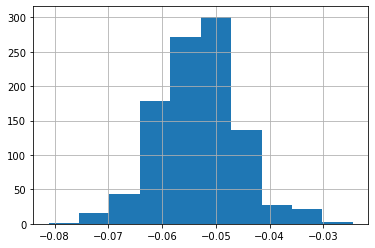

In [172]:
pd.Series(result).hist()

In [173]:
borders1 = np.percentile(result, [2.5, 97.5])
borders1

array([-0.06683774, -0.0361482 ])

In [ ]:
#результат аналогичен предыдущим двум пунктам